In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [155]:
# Import data
house_listings_df = pd.read_csv("/Users/yengmacbook/Downloads/archive/listings.csv")
house_calendar_df = pd.read_csv("/Users/yengmacbook/Downloads/archive/calendar.csv")
house_reviews_df = pd.read_csv("/Users/yengmacbook/Downloads/archive/reviews.csv")

In [157]:
# Show 5 first rows of each dataset
print(house_listings_df.head())
print(house_calendar_df.head())
print(house_reviews_df.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [159]:
# Check data types and missing values
print(house_listings_df.info())
print(house_calendar_df.info())
print(house_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [161]:
# Check for missing data
print(house_listings_df.isnull().sum())
print(house_calendar_df.isnull().sum())
print(house_reviews_df.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64
listing_id         0
date               0
available          0
price         459028
dtype: int64
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [163]:
# Impute missing values with mean for numeric columns
house_listings_df['review_scores_rating'] = house_listings_df['review_scores_rating'].fillna(house_listings_df['review_scores_rating'].mean())

In [165]:
house_listings_df['review_scores_rating']

0        95.000000
1        96.000000
2        97.000000
3        94.539262
4        92.000000
           ...    
3813     80.000000
3814    100.000000
3815     94.539262
3816     94.539262
3817     94.539262
Name: review_scores_rating, Length: 3818, dtype: float64

In [167]:
# Impute the most frequent value for categorical columns
house_listings_df['host_is_superhost'] =  house_listings_df['host_is_superhost'].fillna(house_listings_df['host_is_superhost'].mode()[0])

In [169]:
house_listings_df['host_is_superhost']

0       f
1       t
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: host_is_superhost, Length: 3818, dtype: object

In [171]:
print(house_calendar_df['price'].head(10))  # Show the first 10 entries in the 'price' column

0    $85.00
1    $85.00
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    $85.00
Name: price, dtype: object


In [175]:
# Data cleaning for Price column
house_calendar_df['price'] = house_calendar_df['price'].replace(r'\$|,', '', regex=True)

In [181]:
# Replace NaN value with 0
house_calendar_df['price'] = house_calendar_df['price'].fillna(0)
print(house_calendar_df['price'])

0          85.00
1          85.00
2              0
3              0
4              0
           ...  
1393565        0
1393566        0
1393567        0
1393568        0
1393569        0
Name: price, Length: 1393570, dtype: object


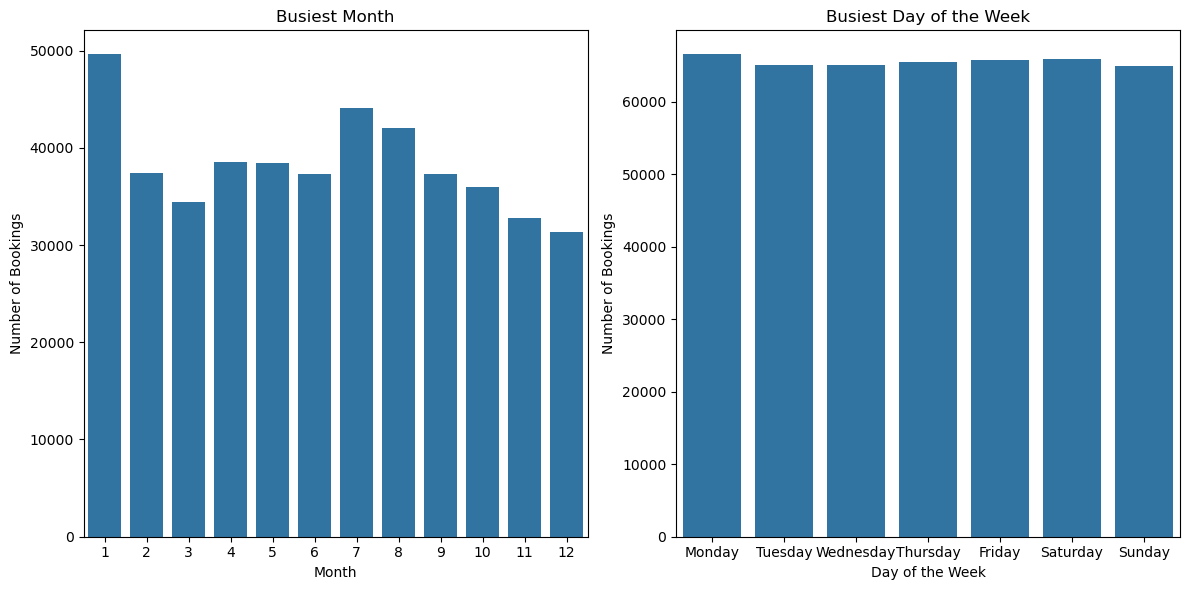

In [183]:
# Convert date columns to datetime
house_calendar_df['date'] = pd.to_datetime(house_calendar_df['date'])
house_reviews_df['date'] = pd.to_datetime(house_reviews_df['date'])

# Extract month and day of the week
house_calendar_df['month'] = house_calendar_df['date'].dt.month
house_calendar_df['day_of_week'] = house_calendar_df['date'].dt.day_name()

# Group by month and day of week to find the busiest times
busy_month = house_calendar_df.groupby('month')['available'].apply(lambda x: (x == 'f').sum())
busy_day_of_week = house_calendar_df.groupby('day_of_week')['available'].apply(lambda x: (x == 'f').sum())

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=busy_month.index, y=busy_month.values)
plt.title('Busiest Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.subplot(1, 2, 2)
sns.barplot(x=busy_day_of_week.index, y=busy_day_of_week.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Busiest Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()

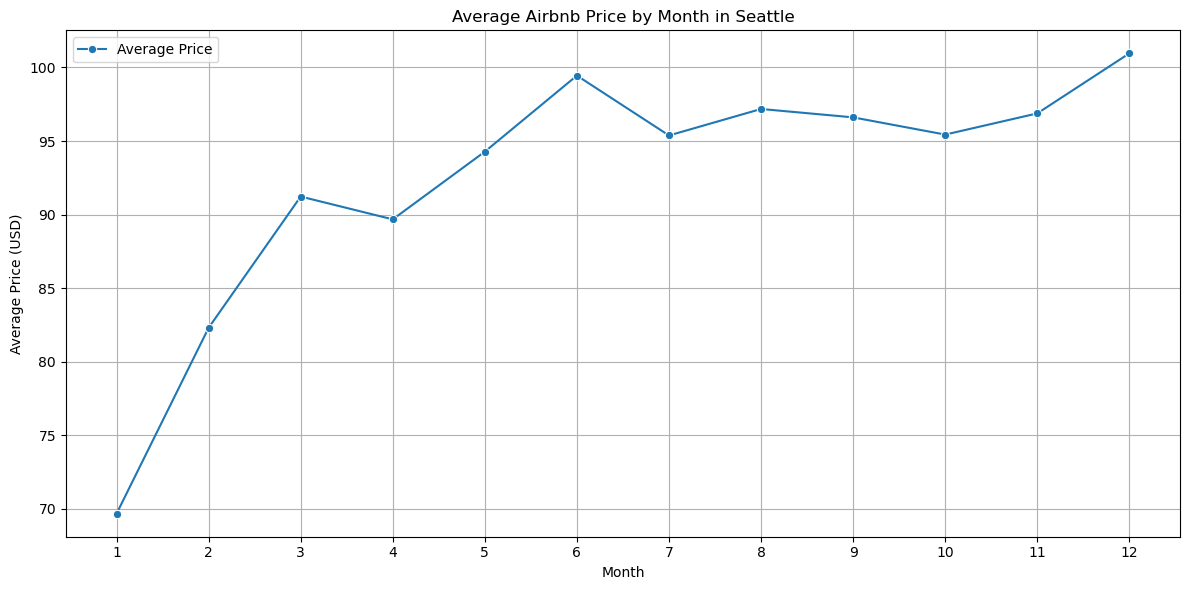

In [189]:
# Group by month and calculate the average price
price_by_month = house_calendar_df.groupby('month')['price'].mean().round(2)

# Ensure the months are in order from January to December
months = range(1, 13)
average_prices = [price_by_month.get(month, 0) for month in months]

# Set up the plot
plt.figure(figsize=(12, 6))

# Line plot for average prices
sns.lineplot(x=months, y=average_prices, marker='o', label='Average Price')

# Formatting the plot
plt.title('Average Airbnb Price by Month in Seattle')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(months)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

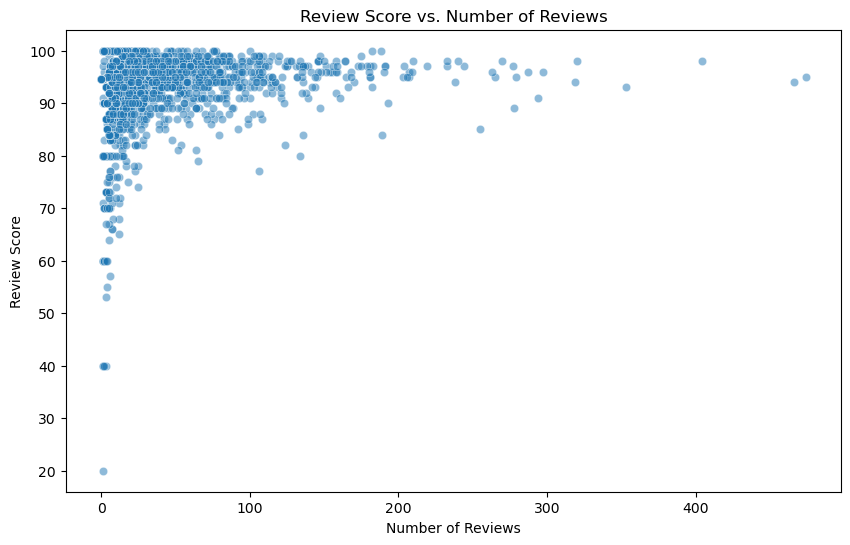

In [191]:
# Scatter plot of review scores vs. number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x=house_listings_df['number_of_reviews'], y=house_listings_df['review_scores_rating'], alpha=0.5)
plt.title('Review Score vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Review Score')
plt.show()

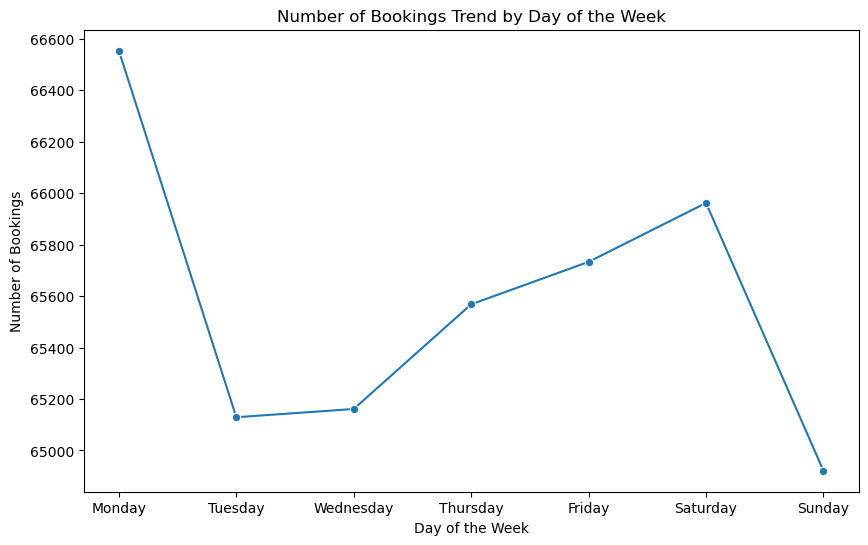

In [193]:
# Count the number of bookings (days when the property is not available) for each day of the week
bookings_by_day = house_calendar_df[house_calendar_df['available'] == 'f'].groupby('day_of_week').size()

# Reorder the days of the week for the plot
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bookings_by_day = bookings_by_day.reindex(ordered_days)

# Line graph of number of bookings trend by day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(x=bookings_by_day.index, y=bookings_by_day.values, marker='o')
plt.title('Number of Bookings Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.show()

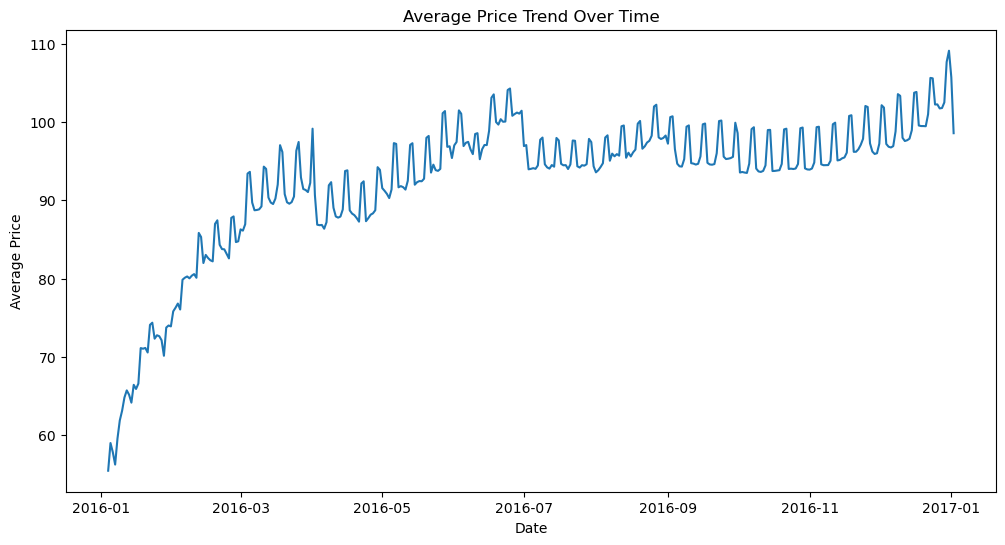

In [195]:
# Line graph of average price trend by date
avg_price_by_date = house_calendar_df.groupby('date')['price'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_date.index, y=avg_price_by_date.values)
plt.title('Average Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

The average review score for Airbnb in Seattle is 94.54


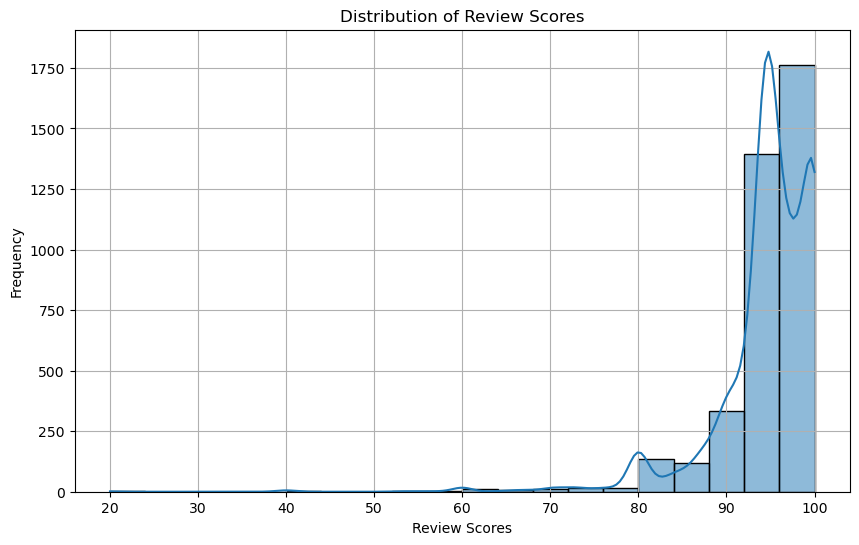

The skewness of the review score distribution is -3.21
The distribution of review scores is left-skewed (negatively skewed).


In [201]:
# Calculate the average review score
average_review_score = house_listings_df['review_scores_rating'].mean()
print(f"The average review score for Airbnb in Seattle is {average_review_score:.2f}")

# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.histplot(house_listings_df['review_scores_rating'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the skewness of the review score distribution
review_score_skewness = skew(house_listings_df['review_scores_rating'].dropna())
print(f"The skewness of the review score distribution is {review_score_skewness:.2f}")

# Determine skewness type
if review_score_skewness > 0:
    print("The distribution of review scores is right-skewed (positively skewed).")
elif review_score_skewness < 0:
    print("The distribution of review scores is left-skewed (negatively skewed).")
else:
    print("The distribution of review scores is symmetrical.")